## Crop Recommendation Module ##

This module helps the users to decide the crop which is best suitable for agriculture based on the data collected from the soil in the field.

The following information is taken into consideration for recommending the crops:
1. Nitrate content
2. Phosphorus content
3. Potassium content
4. Humidity 
5. Temperature
6. pH Value
7. Rainfall


### Import Header ###

In [323]:
import os
import torch
import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, transform

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

### Load the dataset ###

In [2]:
dataset_path = "../data/Crop_recommendation.csv"
curr_dir = os.getcwd()
abs_dataset_path = os.path.join(curr_dir, dataset_path)

dataset = pd.read_csv(abs_dataset_path)

In [3]:
dataset.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
normalized_df=(dataset.iloc[:,:-1]-dataset.iloc[:,:-1].mean())/dataset.iloc[:,:-1].std()

In [7]:
normalized_df.head(5)

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714


### Distribution of the classes in the dataset ###

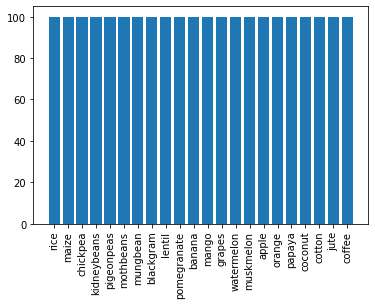

In [8]:
plt.bar(x=range(len(dataset['label'].value_counts())), height=dataset['label'].value_counts())
plt.xticks(range(len(dataset['label'].value_counts())), dataset['label'].unique(), rotation="vertical")
plt.show()

### Splitting the Dataset ###

Split the data set for Training and Testing.

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,0:7], dataset['label'], test_size=0.2, stratify=dataset['label'])
X_train, X_test, y_train, y_test = train_test_split(normalized_df, dataset['label'], test_size=0.2, stratify=dataset['label'])

print(len(X_train), len(X_test), len(y_train), len(y_test))

1760 440 1760 440


### Using K-NeighborsClassifier ###

6 0.9863636363636363


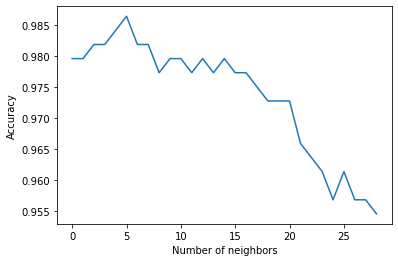

In [296]:
best_k = 0
best_score = 0.0
scores = []
for k in range(1, 30):
    # Define the model
    neigh = KNeighborsClassifier(n_neighbors=k, weights="distance")

    #Train the model
    neigh.fit(X_train, y_train)

    # Predict the labels with the test data
    y_true = neigh.predict(X_test)

    # Calculate the score
    score = neigh.score(X_test,y_test)
    scores.append(score)
    if best_score < score:
        best_score = score
        best_k = k

print(best_k, best_score)

plt.plot(scores)
plt.title("")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [297]:
# Define the model
neigh = KNeighborsClassifier(n_neighbors=6, weights="distance")

#Train the model
neigh.fit(X_train, y_train)

# Predict the labels with the test data
y_true = neigh.predict(X_test)

# Calculate the score
score = neigh.score(X_test,y_test)

# Create a confusion Matrix
cm = confusion_matrix(y_true, y_test)

C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


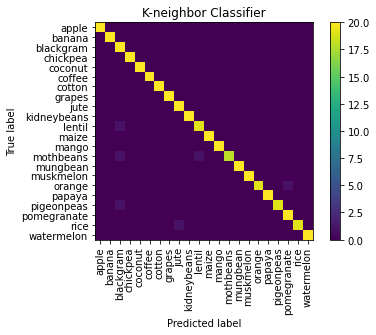

In [298]:
plot_confusion_matrix(neigh, X_test, y_test, xticks_rotation="vertical", include_values=False)   
plt.title("K-neighbor Classifier")
plt.show()

In [299]:
F1_score = f1_score(y_test, y_true, average='macro')
precision = precision_score(y_test, y_true, average='macro')
recall = recall_score(y_test, y_true, average='macro')
print("Results:\n")
print("Accuracy: %.4f"%(score))
print("F1 score: %.4f"%(F1_score))
print("Precision: %.4f"%(precision))
print("Recall: %.4f"%(recall))
results_KN = [round(score,4), round(F1_score,4), round(precision,4), round(recall,4)]
print(classification_report(y_true, y_test, target_names=dataset['label'].unique(), digits=4))

Results:

Accuracy: 0.9864
F1 score: 0.9864
Precision: 0.9875
Recall: 0.9864
              precision    recall  f1-score   support

        rice     1.0000    1.0000    1.0000        20
       maize     1.0000    1.0000    1.0000        20
    chickpea     1.0000    0.8696    0.9302        23
 kidneybeans     1.0000    1.0000    1.0000        20
  pigeonpeas     1.0000    1.0000    1.0000        20
   mothbeans     1.0000    1.0000    1.0000        20
    mungbean     1.0000    1.0000    1.0000        20
   blackgram     1.0000    1.0000    1.0000        20
      lentil     1.0000    0.9524    0.9756        21
 pomegranate     1.0000    1.0000    1.0000        20
      banana     0.9500    0.9500    0.9500        20
       mango     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        20
  watermelon     0.9000    1.0000    0.9474        18
   muskmelon     1.0000    1.0000    1.0000        20
       apple     1.0000    1.0000    1.0000        20
    

### Using DecisionTreeClassifier ###

In [300]:
# Define the model
dt_clf = DecisionTreeClassifier(random_state=0)

# Train the model
dt_clf.fit(X_train, y_train)

# Predict the labels for test data
y_score = dt_clf.predict(X_test)

# Calculate the score
score = dt_clf.score(X_test,y_test)

# Create a confusion Matrix
cm = confusion_matrix(y_score, y_test)

C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


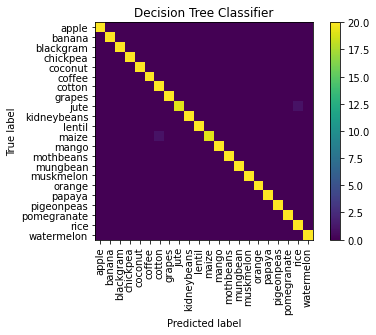

In [301]:
plot_confusion_matrix(dt_clf, X_test, y_test, xticks_rotation="vertical", include_values=False)
plt.title("Decision Tree Classifier")
plt.show()

In [302]:
F1_score = f1_score(y_test, y_score, average='macro')
precision = precision_score(y_test, y_score, average='macro')
recall = recall_score(y_test, y_score, average='macro')
print("Results:\n")
print("Accuracy: %.4f"%(score))
print("F1 score: %.4f"%(F1_score))
print("Precision: %.4f"%(precision))
print("Recall: %.4f"%(recall))
results_DT = [round(score,4), round(F1_score,4), round(precision,4), round(recall,4)]

print(classification_report(y_score, y_test, target_names=dataset['label'].unique(), digits=4))

Results:

Accuracy: 0.9955
F1 score: 0.9955
Precision: 0.9957
Recall: 0.9955
              precision    recall  f1-score   support

        rice     1.0000    1.0000    1.0000        20
       maize     1.0000    1.0000    1.0000        20
    chickpea     1.0000    1.0000    1.0000        20
 kidneybeans     1.0000    1.0000    1.0000        20
  pigeonpeas     1.0000    1.0000    1.0000        20
   mothbeans     1.0000    1.0000    1.0000        20
    mungbean     1.0000    0.9524    0.9756        21
   blackgram     1.0000    1.0000    1.0000        20
      lentil     0.9500    1.0000    0.9744        19
 pomegranate     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
       mango     0.9500    1.0000    0.9744        19
      grapes     1.0000    1.0000    1.0000        20
  watermelon     1.0000    1.0000    1.0000        20
   muskmelon     1.0000    1.0000    1.0000        20
       apple     1.0000    1.0000    1.0000        20
    

### Using SVM Classifier ###

In [303]:
svc_clf = svm.SVC()

# Train the model
svc_clf.fit(X_train, y_train)

# Predict the labels for test data
y_score = svc_clf.predict(X_test)

# Calculate the score
score = svc_clf.score(X_test,y_test)

C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


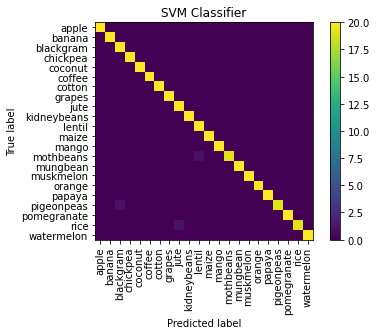

In [304]:
plot_confusion_matrix(svc_clf, X_test, y_test, xticks_rotation="vertical", include_values=False)
plt.title("SVM Classifier")
plt.show()

In [305]:
F1_score = f1_score(y_test, y_score, average='macro')
precision = precision_score(y_test, y_score, average='macro')
recall = recall_score(y_test, y_score, average='macro')
print("Results:\n")
print("Accuracy: %.4f"%(score))
print("F1 score: %.4f"%(F1_score))
print("Precision: %.4f"%(precision))
print("Recall: %.4f"%(recall))
results_SVM = [round(score,4), round(F1_score,4), round(precision,4), round(recall,4)]

print(classification_report(y_score, y_test, target_names=dataset['label'].unique(), digits=4))

Results:

Accuracy: 0.9932
F1 score: 0.9932
Precision: 0.9935
Recall: 0.9932
              precision    recall  f1-score   support

        rice     1.0000    1.0000    1.0000        20
       maize     1.0000    1.0000    1.0000        20
    chickpea     1.0000    0.9524    0.9756        21
 kidneybeans     1.0000    1.0000    1.0000        20
  pigeonpeas     1.0000    1.0000    1.0000        20
   mothbeans     1.0000    1.0000    1.0000        20
    mungbean     1.0000    1.0000    1.0000        20
   blackgram     1.0000    1.0000    1.0000        20
      lentil     1.0000    0.9524    0.9756        21
 pomegranate     1.0000    1.0000    1.0000        20
      banana     1.0000    0.9524    0.9756        21
       mango     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        20
  watermelon     0.9500    1.0000    0.9744        19
   muskmelon     1.0000    1.0000    1.0000        20
       apple     1.0000    1.0000    1.0000        20
    

### Using Logistic Regression ###

In [306]:
lr_clf = LogisticRegression(multi_class='multinomial', random_state=1)

# Train the model
lr_clf.fit(X_train, y_train)

# Predict the labels for test data
y_score = lr_clf.predict(X_test)

# Calculate the score
score = lr_clf.score(X_test,y_test)

C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


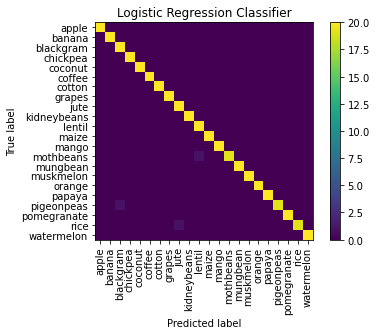

In [313]:
plot_confusion_matrix(lr_clf, X_test, y_test, xticks_rotation="vertical", include_values=False)
plt.title("Logistic Regression Classifier")
plt.show()

In [314]:
F1_score = f1_score(y_test, y_score, average='macro')
precision = precision_score(y_test, y_score, average='macro')
recall = recall_score(y_test, y_score, average='macro')
print("Results:\n")
print("Accuracy: %.4f"%(score))
print("F1 score: %.4f"%(F1_score))
print("Precision: %.4f"%(precision))
print("Recall: %.4f"%(recall))
results_LR = [round(score,4), round(F1_score,4), round(precision,4), round(recall,4)]

print(classification_report(y_score, y_test, target_names=dataset['label'].unique(), digits=4))

Results:

Accuracy: 0.9977
F1 score: 0.9977
Precision: 0.9978
Recall: 0.9977
              precision    recall  f1-score   support

        rice     1.0000    1.0000    1.0000        20
       maize     1.0000    1.0000    1.0000        20
    chickpea     1.0000    1.0000    1.0000        20
 kidneybeans     1.0000    1.0000    1.0000        20
  pigeonpeas     1.0000    1.0000    1.0000        20
   mothbeans     1.0000    1.0000    1.0000        20
    mungbean     1.0000    1.0000    1.0000        20
   blackgram     1.0000    1.0000    1.0000        20
      lentil     1.0000    0.9524    0.9756        21
 pomegranate     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
       mango     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        20
  watermelon     1.0000    1.0000    1.0000        20
   muskmelon     1.0000    1.0000    1.0000        20
       apple     1.0000    1.0000    1.0000        20
    

### Using Random Forest Classifier ###

In [315]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=1)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict the labels for test data
y_score = rf_clf.predict(X_test)

# Calculate the score
score = rf_clf.score(X_test,y_test)

C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


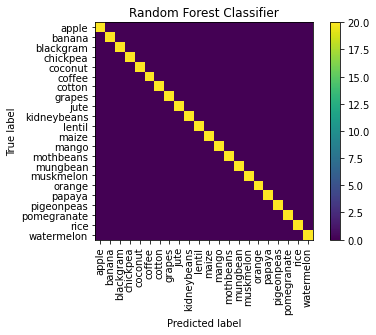

In [316]:
plot_confusion_matrix(rf_clf, X_test, y_test, xticks_rotation="vertical", include_values=False)
plt.title("Random Forest Classifier")
plt.show()

In [317]:
F1_score = f1_score(y_test, y_score, average='macro')
precision = precision_score(y_test, y_score, average='macro')
recall = recall_score(y_test, y_score, average='macro')
print("Results:\n")
print("Accuracy: %.4f"%(score))
print("F1 score: %.4f"%(F1_score))
print("Precision: %.4f"%(precision))
print("Recall: %.4f"%(recall))
results_RF = [round(score,4), round(F1_score,4), round(precision,4), round(recall,4)]

print(classification_report(y_score, y_test, target_names=dataset['label'].unique(), digits=4))

Results:

Accuracy: 1.0000
F1 score: 1.0000
Precision: 1.0000
Recall: 1.0000
              precision    recall  f1-score   support

        rice     1.0000    1.0000    1.0000        20
       maize     1.0000    1.0000    1.0000        20
    chickpea     1.0000    1.0000    1.0000        20
 kidneybeans     1.0000    1.0000    1.0000        20
  pigeonpeas     1.0000    1.0000    1.0000        20
   mothbeans     1.0000    1.0000    1.0000        20
    mungbean     1.0000    1.0000    1.0000        20
   blackgram     1.0000    1.0000    1.0000        20
      lentil     1.0000    1.0000    1.0000        20
 pomegranate     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
       mango     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        20
  watermelon     1.0000    1.0000    1.0000        20
   muskmelon     1.0000    1.0000    1.0000        20
       apple     1.0000    1.0000    1.0000        20
    

### Using Gaussian NB ###

In [318]:
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Predict the labels for test data
y_score = nb_clf.predict(X_test)

# Calculate the score
score = nb_clf.score(X_test,y_test)

C:\Users\kjpoo\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


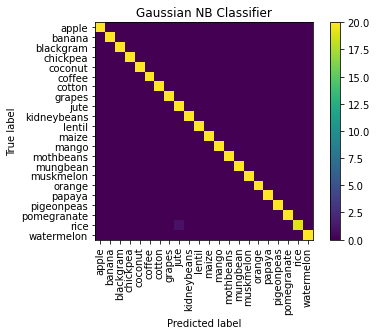

In [322]:
plot_confusion_matrix(nb_clf, X_test, y_test, xticks_rotation="vertical", include_values=False)
plt.title("Gaussian NB Classifier")
plt.show()

In [320]:
F1_score = f1_score(y_test, y_score, average='macro')
precision = precision_score(y_test, y_score, average='macro')
recall = recall_score(y_test, y_score, average='macro')
print("Results:\n")
print("Accuracy: %.4f"%(score))
print("F1 score: %.4f"%(F1_score))
print("Precision: %.4f"%(precision))
print("Recall: %.4f"%(recall))
results_NB = [round(score,4), round(F1_score,4), round(precision,4), round(recall,4)]

print(classification_report(y_score, y_test, target_names=dataset['label'].unique(), digits=4))

Results:

Accuracy: 0.9977
F1 score: 0.9977
Precision: 0.9978
Recall: 0.9977
              precision    recall  f1-score   support

        rice     1.0000    1.0000    1.0000        20
       maize     1.0000    1.0000    1.0000        20
    chickpea     1.0000    1.0000    1.0000        20
 kidneybeans     1.0000    1.0000    1.0000        20
  pigeonpeas     1.0000    1.0000    1.0000        20
   mothbeans     1.0000    1.0000    1.0000        20
    mungbean     1.0000    1.0000    1.0000        20
   blackgram     1.0000    1.0000    1.0000        20
      lentil     1.0000    0.9524    0.9756        21
 pomegranate     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
       mango     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        20
  watermelon     1.0000    1.0000    1.0000        20
   muskmelon     1.0000    1.0000    1.0000        20
       apple     1.0000    1.0000    1.0000        20
    

### Comparing the models ###

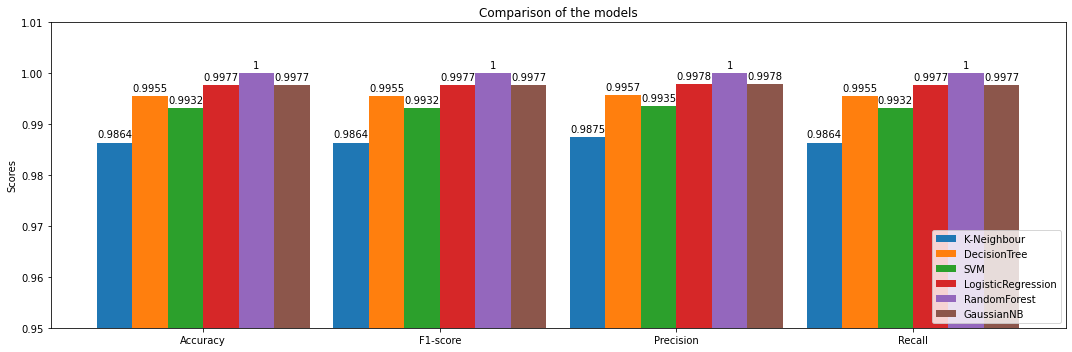

In [321]:
labels = ["Accuracy", "F1-score", "Precision", "Recall"]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - 5*width/2, results_KN, width, label='K-Neighbour')
rects2 = ax.bar(x - 3*width/2, results_DT, width, label='DecisionTree')
rects3 = ax.bar(x - 1*width/2, results_SVM, width, label='SVM')
rects4 = ax.bar(x + 1*width/2, results_LR, width, label='LogisticRegression')
rects5 = ax.bar(x + 3*width/2, results_RF, width, label='RandomForest')
rects6 = ax.bar(x + 5*width/2, results_NB, width, label='GaussianNB')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of the models')
ax.set_xticks(x, labels)
ax.legend(loc=4)
ax.set_ylim(0.9500, 1.010)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)
ax.bar_label(rects6, padding=3)

fig.tight_layout()

plt.show()